# Modul 8 Praktikum Sains Data: *Deep Learning* dengan Keras, Regresi dan Klasifikasi Gambar

Kembali ke [Sains Data](./saindat2024genap.qmd)

(work in progress!)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

## *Perceptron, revisited*: selain *Sequential API*

Di pertemuan sebelumnya, kita telah menyusun *perceptron* menggunakan Sequential API seperti berikut (ada dua cara yang ekuivalen):

In [ ]:
# langsung menentukan semua layer di awal, dengan memasukkan list
model0 = keras.Sequential(
    [
        keras.layers.InputLayer(input_shape = (2,)),
        keras.layers.Dense(units = 1, activation = keras.activations.sigmoid)
    ]
)

In [ ]:
# menambahkan layer secara berangsur-angsur
model0 = keras.Sequential()
model0.add(keras.layers.InputLayer(input_shape = (2,)))
model0.add(keras.layers.Dense(units = 1, activation = keras.activations.sigmoid))

Sequential API sebenarnya cukup terbatas: tiap *layer* harus berurutan satu sama lain, dan hubungan yang ada hanyalah antar pasangan dua *layer* yang bersebelahan.

Untuk model-model yang kita pelajari di mata kuliah Sains Data, sebenarnya Sequential API sudah cukup. Namun, kalau kalian pelajari lebih lanjut tentang *neural network* / *deep learning*, kalian akan bertemu dengan arsitektur aneh yang tidak bisa langsung disusun dengan Sequential API.

Contohnya, ada yang namanya *skip connection*, yaitu suatu *layer* terhubung dengan *layer* lain yang agak jauh darinya:

![](./gambar/aggarwal_nndl_hal348.png)

Sumber gambar: Aggarwal (2018) hal. 348

Untuk itu, diperlukan API selain *Sequential*, yaitu bisa dengan *Functional API* atau dengan *Subclassing API*. Agar kalian lebih mengenal Keras, kita akan mencoba membuat *perceptron* menggunakan dua API lainnya tersebut.

Kita bisa uji coba dengan dataset yang sama seperti di pertemuan sebelumnya: [titik_negatif_positif.csv](./titik_negatif_positif.csv)

In [31]:
df = pd.read_csv("./titik_negatif_positif.csv", dtype="float32")

In [32]:
inputs_df = df.drop(columns=["kelas"])
targets_df = df[["kelas"]]

In [33]:
inputs_arr = inputs_df.to_numpy()
targets_arr = targets_df.to_numpy()

### *Functional API*

Ide dari *Functional API* adalah menyusun tiap *layer* dan hubungan antar *layer* sebagai komposisi fungsi.

Untuk *Functional API*, daripada `keras.layers.InputLayer`, gunakan `keras.layers.Input`

In [6]:
m1_input = keras.layers.Input(shape = (2,))

m1_layer1_func = keras.layers.Dense(units = 1, activation = keras.activations.sigmoid)
m1_layer1_out = m1_layer1_func(m1_input) # seperti komposisi fungsi

model1 = keras.Model(inputs=m1_input, outputs=m1_layer1_out, name="model1")

In [7]:
model1.summary()

Model: "model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [ ]:
keras.utils.plot_model(
    model1,
    show_shapes = True,
    show_layer_activations = True,
    to_file = "keras_functional_model1.png"
)

![](./keras_functional_model1.png)

Sisanya (*compile* lalu *fit*) sama dengan Sequential API

In [34]:
model1.compile(
    optimizer = keras.optimizers.SGD(learning_rate = 0.01),
    loss = keras.losses.BinaryCrossentropy(),
    metrics = [keras.metrics.BinaryAccuracy()]
)

In [35]:
history1 = model1.fit(inputs_arr, targets_arr, epochs=100, validation_split=0.2)

Epoch 1/100
50/50 [==============================] - 4s 31ms/step - loss: 1.2000 - binary_accuracy: 0.6144 - val_loss: 2.1506 - val_binary_accuracy: 0.0775
Epoch 2/100
50/50 [==============================] - 0s 4ms/step - loss: 0.6425 - binary_accuracy: 0.6837 - val_loss: 1.0554 - val_binary_accuracy: 0.3575
Epoch 3/100
50/50 [==============================] - 0s 4ms/step - loss: 0.3413 - binary_accuracy: 0.8344 - val_loss: 0.5549 - val_binary_accuracy: 0.7150
Epoch 4/100
50/50 [==============================] - 0s 5ms/step - loss: 0.2141 - binary_accuracy: 0.9406 - val_loss: 0.3460 - val_binary_accuracy: 0.8975
Epoch 5/100
50/50 [==============================] - 0s 5ms/step - loss: 0.1576 - binary_accuracy: 0.9800 - val_loss: 0.2475 - val_binary_accuracy: 0.9550
Epoch 6/100
50/50 [==============================] - 1s 10ms/step - loss: 0.1277 - binary_accuracy: 0.9900 - val_loss: 0.1938 - val_binary_accuracy: 0.9675
Epoch 7/100
50/50 [==============================] - 0s 7ms/step - l

Kita bisa ubah *dictionary* `.history` menjadi CSV:

In [36]:
pd.DataFrame(history1.history).to_csv("./keras_functional_history1.csv", index=False)

Import kembali:

In [37]:
history1_df = pd.read_csv("./keras_functional_history1.csv")

Lalu plot *loss*:

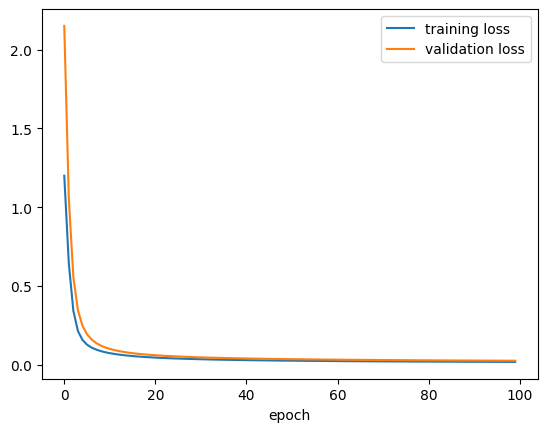

In [38]:
plt.plot(history1_df["loss"], label = "training loss")
plt.plot(history1_df["val_loss"], label = "validation loss")
plt.xlabel("epoch")
plt.legend()
plt.show()

### *Subclassing API* (yaitu dengan OOP)

Untuk model yang lebih kompleks, mungkin komposisi fungsi akan membuat pusing, karena banyak fungsi bertebaran di mana-mana. Agar lebih rapi dan terstruktur, daripada menggunakan *Functional API*, kita bisa gunakan *Subclassing API*, yaitu dengan OOP / *object oriented programming*.

Silakan *review* [Modul 2 Praktikum Struktur Data tentang Pengantar OOP](../../../2023/ganjil/strukdat_py/Strukdat2023_Modul02.ipynb) kalau perlu ;)

Dalam *Subclassing API*, model yang kita buat berupa *class* yang meng-*inherit* (atau disebut *subclassing*) dari `keras.Model` yang sudah mengimplementasikan sebagian besar *method* yang kita butuhkan.

Dalam model yang kita susun, hanya diperlukan:

- *constructor* `__init__` berisi minimal satu baris, yaitu `super().__init__()` dan boleh berisi baris lainnya untuk menyiapkan atribut (variabel) yang langsung bisa dibuat ketika model dibuat (sebelum mulai *training*)

- *method* `call` yang mendefinisikan bagaimana *forward pass*

- (opsional) *method* `build` yang menyiapkan atribut yang bisa dibuat di awal *training* setelah ukuran input diketahui

In [55]:
class MyPerceptron(keras.Model):
    def __init__(self, units=1):
        super().__init__()

        # banyaknya neuron di output layer
        self.units = units

    # menyiapkan parameter (weights and biases) tergantung ukuran input
    def build(self, input_shape):
        input_dim = input_shape[-1]

        # matriks W terkadang disebut kernel
        self.kernel = self.add_weight(
            shape = (input_dim, self.units),
            initializer = keras.initializers.RandomNormal(mean=0, stddev=0.05),
            trainable = True,
        )
        self.bias = self.add_weight(
            shape = (self.units,),
            initializer = keras.initializers.RandomNormal(),
            trainable = True
        )

    # forward pass
    def call(self, inputs):
        return tf.sigmoid(
            tf.matmul(inputs, self.kernel) + self.bias
        )

Kita harus membuat *instance* atau objek dari *class* ini terlebih dahulu, lalu memanggil `.build()` dulu, agar kemudian bisa melakukan misalnya `.fit()`

In [56]:
model2 = MyPerceptron()

In [57]:
model2.build(input_shape = (2,))

Sekarang kita bisa *compile*, *fit*, simpan *history*, dan plot *loss* seperti biasa...

In [58]:
model2.compile(
    optimizer = keras.optimizers.SGD(learning_rate = 0.01),
    loss = keras.losses.BinaryCrossentropy(),
    metrics = [keras.metrics.BinaryAccuracy()]
)

In [59]:
history2 = model2.fit(inputs_arr, targets_arr, epochs=100, validation_split=0.2)

Epoch 1/100
50/50 [==============================] - 2s 8ms/step - loss: 0.5171 - binary_accuracy: 0.9000 - val_loss: 0.4495 - val_binary_accuracy: 0.9725
Epoch 2/100
50/50 [==============================] - 0s 3ms/step - loss: 0.2978 - binary_accuracy: 0.9944 - val_loss: 0.3160 - val_binary_accuracy: 0.9800
Epoch 3/100
50/50 [==============================] - 0s 3ms/step - loss: 0.2108 - binary_accuracy: 0.9950 - val_loss: 0.2446 - val_binary_accuracy: 0.9850
Epoch 4/100
50/50 [==============================] - 0s 4ms/step - loss: 0.1650 - binary_accuracy: 0.9950 - val_loss: 0.2012 - val_binary_accuracy: 0.9900
Epoch 5/100
50/50 [==============================] - 0s 4ms/step - loss: 0.1368 - binary_accuracy: 0.9956 - val_loss: 0.1720 - val_binary_accuracy: 0.9900
Epoch 6/100
50/50 [==============================] - 0s 4ms/step - loss: 0.1176 - binary_accuracy: 0.9962 - val_loss: 0.1510 - val_binary_accuracy: 0.9900
Epoch 7/100
50/50 [==============================] - 0s 4ms/step - los

In [60]:
pd.DataFrame(history2.history).to_csv("./keras_subclassing_history2.csv", index=False)

In [61]:
history2_df = pd.read_csv("./keras_subclassing_history2.csv")

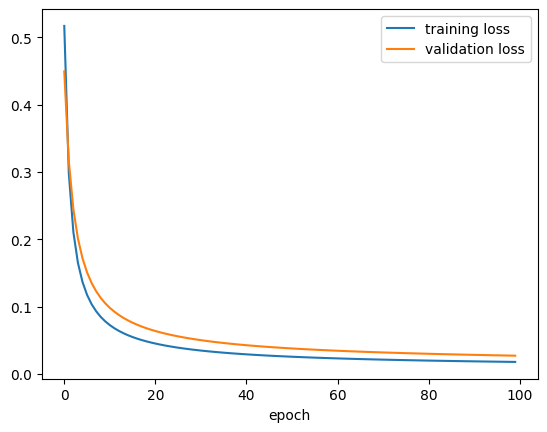

In [62]:
plt.plot(history2_df["loss"], label = "training loss")
plt.plot(history2_df["val_loss"], label = "validation loss")
plt.xlabel("epoch")
plt.legend()
plt.show()

## Contoh *skip connection* denan *Functional API*

Kita lihat lagi gambar *skip connection*:

![](./gambar/aggarwal_nndl_hal348.png)

Sumber gambar: Aggarwal (2018) hal. 348

Dari gambarnya, kita bisa coba susun *neural network* nya:

In [71]:
# x
f3_input = keras.layers.Input(shape = (5,))

# weight layers
f3_layer1_func = keras.layers.Dense(units = 10, activation = keras.activations.linear)
f3_layer2_func = keras.layers.Dense(units = 5, activation = keras.activations.relu)

# F(x)
F_out = f3_layer2_func(f3_layer1_func(f3_input))

# F(x) + x
f3_layer3_out = F_out + f3_input

# membuat model akhir
model3 = keras.Model(inputs=f3_input, outputs=f3_layer3_out, name="model3")

In [72]:
model3.summary()

Model: "model3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 5)]          0           []                               
                                                                                                  
 dense_9 (Dense)                (None, 10)           60          ['input_7[0][0]']                
                                                                                                  
 dense_10 (Dense)               (None, 5)            55          ['dense_9[0][0]']                
                                                                                                  
 tf.__operators__.add_3 (TFOpLa  (None, 5)           0           ['dense_10[0][0]',               
 mbda)                                                            'input_7[0][0]']           

In [ ]:
keras.utils.plot_model(
    model3,
    show_shapes = True,
    show_layer_activations = True,
    to_file = "keras_functional_model3.png"
)

![](./keras_functional_model3.png)

## *Neural Network* untuk Regresi

## Klasifikasi Gambar dengan *flatten*

## Pengantar CNN *(Convolutional Neural Network)*

## Referensi

Sumber gambar

- Aggarwal, C. Charu. 2018. *Neural Networks and Deep Learning: A Textbook.* Edisi Pertama. Springer.